In [3]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Create a function called 'scatterplot' which can be done for simple Time Series Graphs with a line connecting each point
def scatterplot(xdata,ydata,title,xlabel,ylabel,marker='o'):
    plt.figure(figsize = (12,6))
    plt.scatter(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [5]:
#Create a function called 'time_series_line' which can be done for simple Time Series Graphs with a line connecting each point
def line_time_series(xdata,ydata,title,xlabel,ylabel,marker='o'):
    plt.figure(figsize = (12,6))
    ydata.plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [6]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange

def lagrange_interpolation(df,x_column,y_column,date_1,date_2,x_data_points,title,xlabel,ylabel):
    """
    df is the dataframe that the original data is going to be collection from
    x_column is the name of column for the x values
    y_column is the name of column for the y values
    date_1 is the first date for the desired interpolated data
    date_2 is the second for the desired interpolated data
    x_data_points is the number of times that the interpolated data will return y values
    for example: if you have 28 as the x_data_points for a week you will get 4 data points per day (28/7=4)
    title is the name of the graph that will return the interpolated data
    xlabel is the name of the x axis label for the interpolated data graph
    ylabel is the name of the y axis label for the interpolated data graph
    """
    # Create the x-values based on the dates, pulling from the dataframe
    #You have to turn your original data into an array so that it can be processed by the 'lagrange' function
    x = np.array(df[x_column].loc[date_1:date_2])
    # Create the y values based on the dates, pulling from the dataframe
    y = np.array(df[y_column].loc[date_1:date_2])

    #This is going to create an array which has the polynomial coefficients for the data
    #It takes the series of x and y data and applies the lagrange method 
    poly = lagrange(x,y)

    #Using poly.coef is going to return the coefficients of the polynomial from the x and y values above
    #Turn the array of coefficients in the reverse order so that the graph can be plotted
    coefficients = poly.coef[::-1]

    #Generate x values for plotting the polynomial
    #The more x_data_points used the smoother the curve will be
    x_values = np.linspace(x.min(), x.max(), x_data_points)   
    
    #Create the polynomial y values that are created at the times of the x_values
    #The polynomial function takes the coefficients from the lagrange interpolation of x and y values
    #It also takes the x_values to return those y values at the interval of x values
    y_values = Polynomial(coefficients)(x_values)

    # Create sliced_data DataFrame containing values between date_1 and date_2
    sliced_data = df[(df['Day'] >= date_1) & (df['Day'] <= date_2)]
    
    # Plot the interpolation

    #plt.plot() is going to return the x_data_points number with the y_value polynomial values at those intervals
    plt.plot(x_values, y_values, label='Interpolation')
    #plt.scatter() is going to graph the original data points on the graph
    plt.scatter(x,y, color='red', label='Data Points')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.title() is going to use the date values to change instead of having to manually change the title
    plt.title('Lagrange Interpolation of ' + title + ' (Day ' + str(date_1+1) + '-' + str(date_2+1) + ')')
    plt.legend()
    plt.grid(True)
    plt.show()

    #Return the table of results
    interpolated_data = pd.DataFrame({'Time':x_values,ylabel:y_values})
    return interpolated_data, x,y,x_values,y_values, sliced_data


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def newton_divided_difference(x, y):
    """
    Compute the divided differences table for Newton's divided difference interpolation.

    Parameters:
    x : array-like
        The x values.
    y : array-like
        The y values corresponding to the x values.

    Returns:
    array-like
        The divided differences table.
    """
    n = len(x)
    table = np.zeros((n, n))
    table[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (x[i + j] - x[i])

    return table

def interpolate(x, y, target_x):
    """
    Perform Newton's divided difference interpolation.

    Parameters:
    x : array-like
        The x values.
    y : array-like
        The y values corresponding to the x values.
    target_x : float or array-like
        The target x value(s) for interpolation.

    Returns:
    float or array-like
        The interpolated value(s) corresponding to the target_x.
    """
    table = newton_divided_difference(x, y)
    n = len(x)
    interpolated_values = []

    for target in np.atleast_1d(target_x):
        result = table[0, 0]
        for i in range(1, n):
            term = table[0, i]
            for j in range(i):
                term *= (target - x[j])
            result += term
        interpolated_values.append(result)

    return np.squeeze(interpolated_values)

def plot_interpolation(x, y, target_x, interpolated_values, xlabel, ylabel):
    """
    Plot the interpolation function along with the original data points.

    Parameters:
    x : array-like
        The x values.
    y : array-like
        The y values corresponding to the x values.
    target_x : float or array-like
        The target x value(s) for interpolation.
    interpolated_values : array-like
        The interpolated value(s) corresponding to the target_x.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'bo', label='Original Data')
    plt.plot(target_x, interpolated_values, 'r*', label='Interpolated Points')
    
    # Plot the interpolation function
    xx = np.linspace(min(x), max(x), 100)
    yy = interpolate(x, y, xx)
    plt.plot(xx, yy, 'g-', label='Interpolation Function')
    
    plt.title('Newton\'s Divided Difference Interpolation')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

### Problem 1: Temperature Data Interpolation 

Given a set of monthly average temperature readings over several years, interpolate missing monthly data to complete the series.

This data takes temperature for a calendar year. For this data, it is going to be assumed that the time of the recording of the temperature was taken in the middle of the day. This can be expressed by converting the day column and creating a new column called timestamp. With this distinction from the interval of a day to one that is on a 24 hour time period can allow for more data to be fitted into the graph. The goal will be to take recordings of temperature at 6am, 6pm and midnight so that there is a recording every 6 hours.

In [8]:
#Load in the data and observe
data_temperature = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Mathmatical Modeling/Project 2/temperature_data.csv')
data_temperature

,Day,Temperature
0,1,11.251629
1,2,10.239796
2,3,12.069672
3,4,14.078096
4,5,10.821165
...,...,...
360,361,10.006657
361,362,12.291183
362,363,9.266156
363,364,10.545223


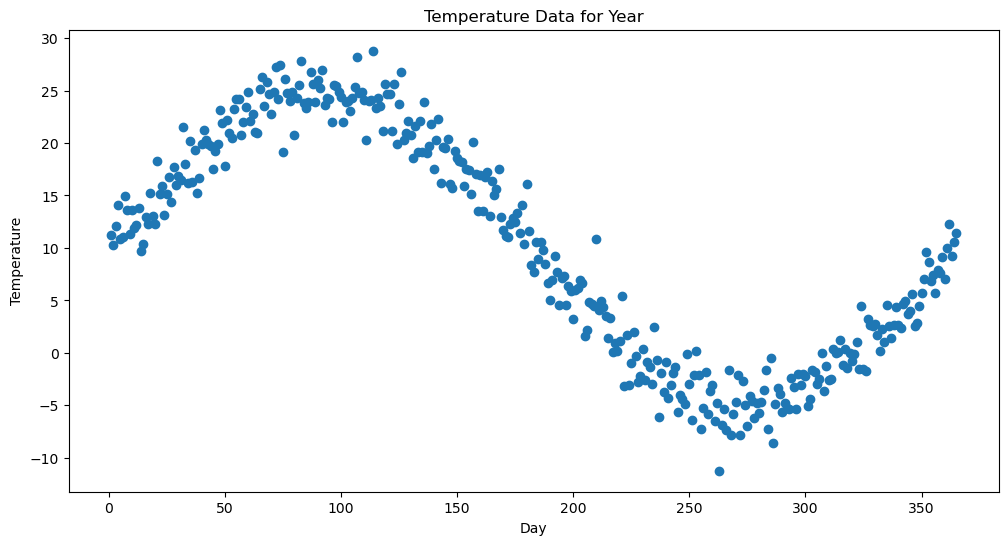

In [9]:
#Graph the data and look for points where the data is missing
scatterplot(data_temperature['Day'],data_temperature['Temperature'],'Temperature Data for Year','Day','Temperature')

In [10]:
data_temperature['Day']

0        1
1        2
2        3
3        4
4        5
      ... 
360    361
361    362
362    363
363    364
364    365
Name: Day, Length: 365, dtype: int64

In [11]:
import pandas as pd

def temperature_at_time(df, times):
    """
    Get the temperature at the specified times from the DataFrame.

    Parameters:
    - df: DataFrame containing temperature data.
    - times: List of times at which temperature is requested.

    Returns:
    - DataFrame with two columns: 'Time' and 'Temperature'.
    """
    time_series = []
    temperature_series = []
    
    for time in times:
        temperature = df.loc[df['Rounded Time'] == time, 'Temperature']
        if not temperature.empty:
            time_series.append(time)
            temperature_series.append(temperature.values[0])
        else:
            time_series.append(time)
            temperature_series.append("Temperature data not available")

    return pd.DataFrame({'Time': time_series, 'Temperature': temperature_series})

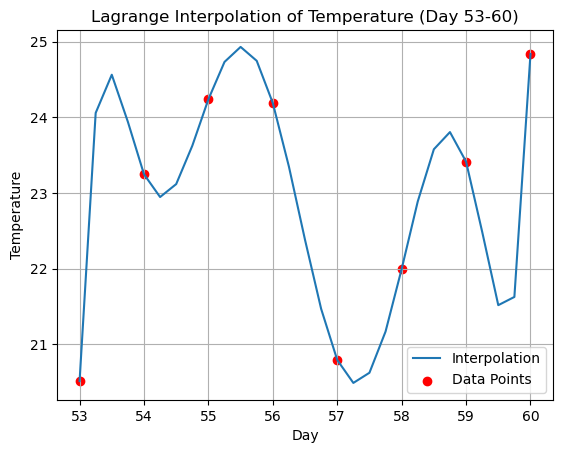

In [12]:
#Using the function you can create a lagrange interpolation between any points
#You can choose any two days as long as the distance is a week
#If you explore this function it seems that it cannot create higher than 7 degree polynomials to match the points
#For this particular graph I am going to choose 28 data points which should return 4 data points per day
#This will create a less smooth graph
interpolated_data_1 = lagrange_interpolation(data_temperature,'Day', 'Temperature',52,59,29,'Temperature','Day','Temperature')

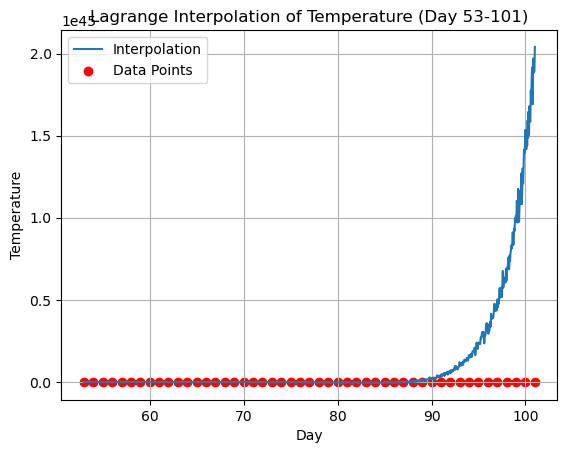

In [13]:
#The following is an example of Runge's Phenonmenon where too many data points are used
interpolated_data_runge = lagrange_interpolation(data_temperature,'Day', 'Temperature',52,100,1000,'Temperature','Day','Temperature')

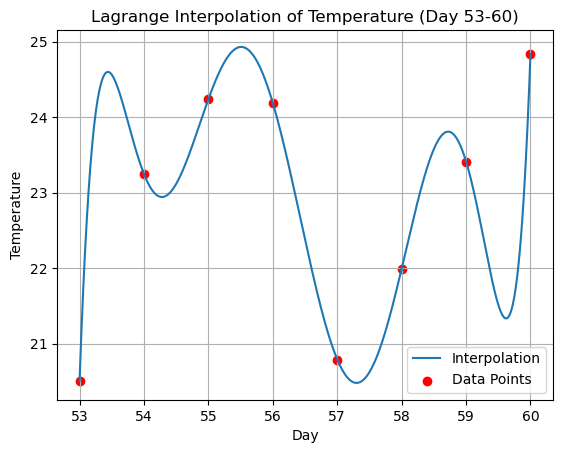

In [14]:
#Create a smoothed curve
interpolated_data_1_smoothed = lagrange_interpolation(data_temperature,'Day', 'Temperature',52,59,1000,'Temperature','Day','Temperature')

In [15]:
#To return the table that was created from the definition, you have to call upon it
#You can see that there was 28 returned values, you can index through the dataframe to get the timestamps you want
interpolated_data_1[0]

,Time,Temperature
0,53.00,20.512444
1,53.25,24.056686
2,53.50,24.561531
3,53.75,23.939045
4,54.00,23.245987
5,54.25,22.945152
6,54.50,23.116177
7,54.75,23.622852
8,55.00,24.237507
9,55.25,24.730827


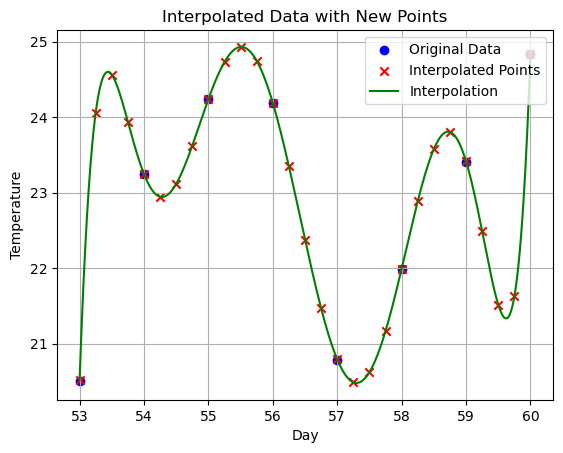

In [16]:
import matplotlib.pyplot as plt

# Plot the original data as scatter plot
plt.scatter(interpolated_data_1[1], interpolated_data_1[2], label='Original Data', color='blue', marker='o')

# Plot the newly interpolated points as scatter plot
plt.scatter(interpolated_data_1[0]['Time'], interpolated_data_1[0]['Temperature'], label='Interpolated Points', color='red', marker='x')

# Plot the interpolation line
plt.plot(interpolated_data_1_smoothed[3], interpolated_data_1_smoothed[4], label='Interpolation', color='green')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Interpolated Data with New Points')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


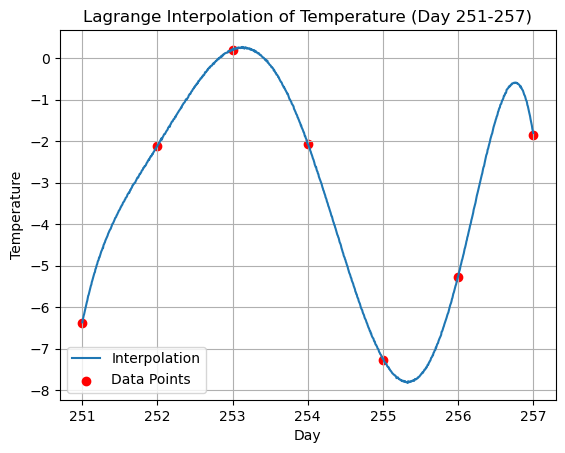

In [17]:
#If you want to create a more detailed dataframe you can increase the number of data points
#The code below is going to look at a different time period
interpolated_data_2 = lagrange_interpolation(data_temperature,'Day','Temperature',250,256,1000,'Temperature','Day','Temperature')

In [18]:
#Return the table of values, 
#with how many x_data_points there are you can get the time at any minute throughout the day
interpolated_data_2[0]

,Time,Temperature
0,251.000000,-6.367188
1,251.006006,-6.312500
2,251.012012,-6.257812
3,251.018018,-6.207031
4,251.024024,-6.171875
...,...,...
995,256.975976,-1.578125
996,256.981982,-1.626953
997,256.987988,-1.703125
998,256.993994,-1.751953


In [19]:
#Get the interpolated data with arounded time so that it can be added as points to the graph
interpolated_data_2_df = interpolated_data_2[0]
interpolated_data_2_df['Rounded Time'] = np.round(interpolated_data_2_df['Time'],2)
interpolated_data_2_df

,Time,Temperature,Rounded Time
0,251.000000,-6.367188,251.00
1,251.006006,-6.312500,251.01
2,251.012012,-6.257812,251.01
3,251.018018,-6.207031,251.02
4,251.024024,-6.171875,251.02
...,...,...,...
995,256.975976,-1.578125,256.98
996,256.981982,-1.626953,256.98
997,256.987988,-1.703125,256.99
998,256.993994,-1.751953,256.99


In [20]:
#Use the temperature at time function to get the temperature at the given time
times = [251.50,252.50,253.50,254.50,255.50,256.50]
interpolated_df = temperature_at_time(interpolated_data_2_df,times)
interpolated_df

,Time,Temperature
0,251.5,-3.646484
1,252.5,-0.697266
2,253.5,-0.166016
3,254.5,-4.845703
4,255.5,-7.640625
5,256.5,-1.523438


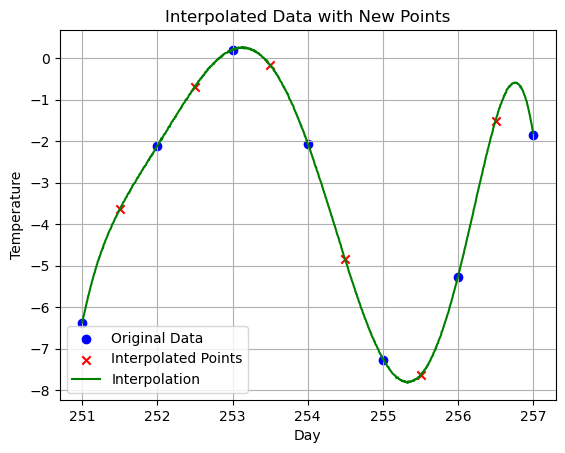

In [21]:
import matplotlib.pyplot as plt

# Plot the original data as scatter plot
plt.scatter(interpolated_data_2[1], interpolated_data_2[2], label='Original Data', color='blue', marker='o')

# Plot the newly interpolated points as scatter plot
plt.scatter(interpolated_df['Time'],interpolated_df['Temperature'], label='Interpolated Points', color='red', marker='x')

# Plot the interpolation line
plt.plot(interpolated_data_2[3], interpolated_data_2[4], label='Interpolation', color='green')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Interpolated Data with New Points')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


### Problem 2: Stock Market Analysis

Use historical stock price data to interpolate missing values and analyze stock performance trends over time.

In [22]:
data_stock = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Mathmatical Modeling/Project 2/stock_market_trends_data.csv')
data_stock

,Unnamed: 0,Company A,Company B,Company C
0,2023-01-02,109.934283,97.234714,112.953771
1,2023-01-03,130.460597,95.316933,95.317261
2,2023-01-04,131.584256,115.348695,90.610512
3,2023-01-05,110.851201,90.731646,90.685405
4,2023-01-06,104.839245,61.734395,65.501643
...,...,...,...,...
255,2023-12-25,85.936471,99.300230,135.416013
256,2023-12-26,87.460659,136.248971,114.155039
257,2023-12-27,88.750664,112.648155,119.451089
258,2023-12-28,112.436199,68.595506,85.457256


In [23]:
#Create the Dickey Fuller test to use on data
#Regression type is c, ct, ctt, n
#constant, constant and trend, constant and linear and quadratic trend, no constant and no trend

from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    """Using the ADF test to determine if a series is stationary"""
    test_results = adfuller(data)
    print('ADF Statistic: ',test_results[0])
    print('P-Value: ',test_results[1])
    print('Critical Value: ',)
    for thres,adf_stat in test_results[4].items():
       print('\t%s: %.2f' % (thres,adf_stat))


In [24]:
def roll_mean_std_dev(df_column,window):

    #Look at the mean and the standard deviation of this data
    rolmean = df_column.rolling(window).mean()
    rolstd = df_column.rolling(window).std()

    #Let's check the stationarity of the graph
    #Plot the rolling statistics
    orig = plt.plot(df_column,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation')
    plt.show(block=False)


In [25]:
data_stock.rename(columns={'Unnamed: 0':'Date'},inplace=True)
data_stock

,Date,Company A,Company B,Company C
0,2023-01-02,109.934283,97.234714,112.953771
1,2023-01-03,130.460597,95.316933,95.317261
2,2023-01-04,131.584256,115.348695,90.610512
3,2023-01-05,110.851201,90.731646,90.685405
4,2023-01-06,104.839245,61.734395,65.501643
...,...,...,...,...
255,2023-12-25,85.936471,99.300230,135.416013
256,2023-12-26,87.460659,136.248971,114.155039
257,2023-12-27,88.750664,112.648155,119.451089
258,2023-12-28,112.436199,68.595506,85.457256


In [26]:
import pandas as pd

# Assuming you already have 'Date' column in your DataFrame

# Convert 'Date' column to datetime
data_stock['Day'] = pd.to_datetime(data_stock['Date'])

# Calculate offsets in days from the first day in the DataFrame
first_day_index = 0  # Assuming you've defined this earlier
offsets = (data_stock['Day'] - data_stock['Day'][first_day_index]).dt.days

# Create a date range based on the first date in the DataFrame
start_date = data_stock['Day'].iloc[0]
data_stock['Day'] = pd.date_range(start=start_date, periods=len(data_stock['Day']), freq='D')

# If you want to add the offsets as a new column
data_stock['Day'] = offsets

data_stock

,Date,Company A,Company B,Company C,Day
0,2023-01-02,109.934283,97.234714,112.953771,0
1,2023-01-03,130.460597,95.316933,95.317261,1
2,2023-01-04,131.584256,115.348695,90.610512,2
3,2023-01-05,110.851201,90.731646,90.685405,3
4,2023-01-06,104.839245,61.734395,65.501643,4
...,...,...,...,...,...
255,2023-12-25,85.936471,99.300230,135.416013,357
256,2023-12-26,87.460659,136.248971,114.155039,358
257,2023-12-27,88.750664,112.648155,119.451089,359
258,2023-12-28,112.436199,68.595506,85.457256,360


In [27]:
#Look for where the data is missing
data_stock['difference_day'] = data_stock['Day'].diff()
data_stock[data_stock['difference_day']>=3].head(5)

,Date,Company A,Company B,Company C,Day,difference_day
5,2023-01-09,88.754249,79.743378,106.284947,7,3.0
10,2023-01-16,87.965868,137.045564,99.730056,14,3.0
15,2023-01-23,85.603116,90.787225,121.142445,21,3.0
20,2023-01-30,90.416515,96.286820,77.873301,28,3.0
25,2023-02-06,116.438050,101.740941,94.019853,35,3.0


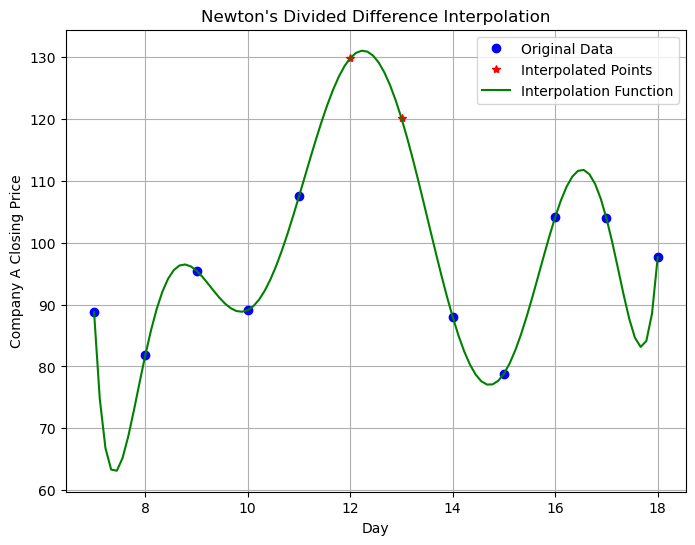

In [28]:
#Create x and y values to be used in Newton's Divided Difference for Company A
#Missing days will plot where the interpolated matches the values of missing days
x = data_stock['Day'].loc[5:14].to_numpy()
y = data_stock['Company A'].loc[5:14].to_numpy()
missing_days = [12, 13]
plot_interpolation(x, y, missing_days, interpolate(x, y, missing_days), 'Day', 'Company A Closing Price')

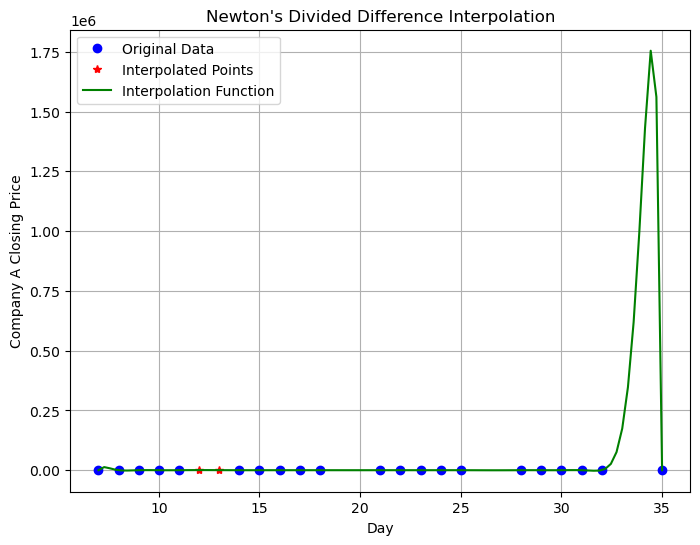

In [29]:
#The purpose of this interpolation is to show Runge's Phenomenon
#Using a data range that exceeds 7-12 days usually results in the Runge Phenomenon
x = data_stock['Day'].loc[5:25].to_numpy()
y = data_stock['Company A'].loc[5:25].to_numpy()
missing_days = [12, 13]
plot_interpolation(x, y, missing_days, interpolate(x, y, missing_days), 'Day', 'Company A Closing Price')

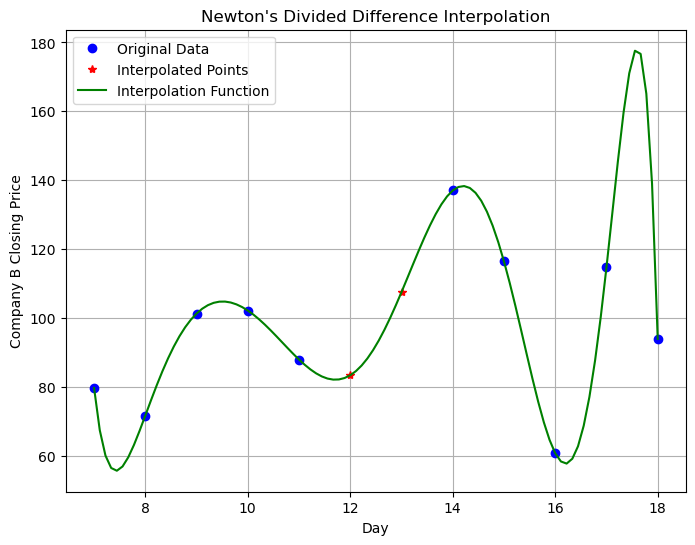

In [30]:
#Create x and y values to be used in Newton's Divided Difference for Company B
#Missing days will plot where the interpolated matches the values of missing days
x = data_stock['Day'].loc[5:14].to_numpy()
y = data_stock['Company B'].loc[5:14].to_numpy()
missing_days = [12, 13]
plot_interpolation(x, y, missing_days, interpolate(x, y, missing_days), 'Day', 'Company B Closing Price')

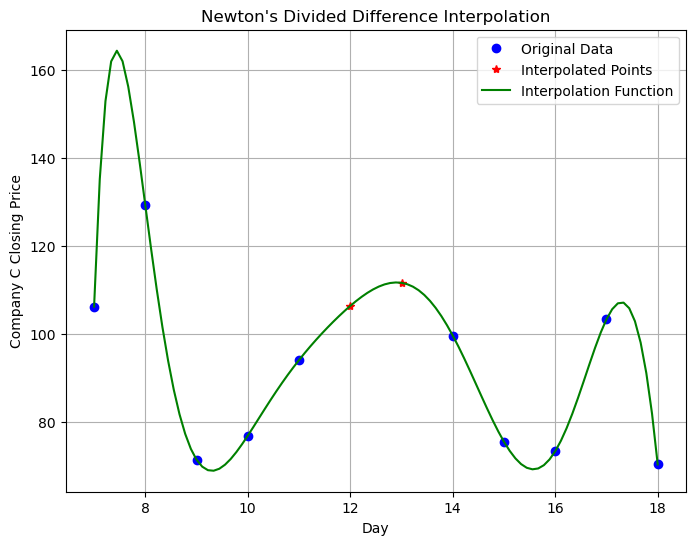

In [31]:
#Create x and y values to be used in Newton's Divided Difference for Company B
#Missing days will plot where the interpolated matches the values of missing days
x = data_stock['Day'].loc[5:14].to_numpy()
y = data_stock['Company C'].loc[5:14].to_numpy()
missing_days = [12, 13]
plot_interpolation(x, y, missing_days, interpolate(x, y, missing_days), 'Day', 'Company C Closing Price')

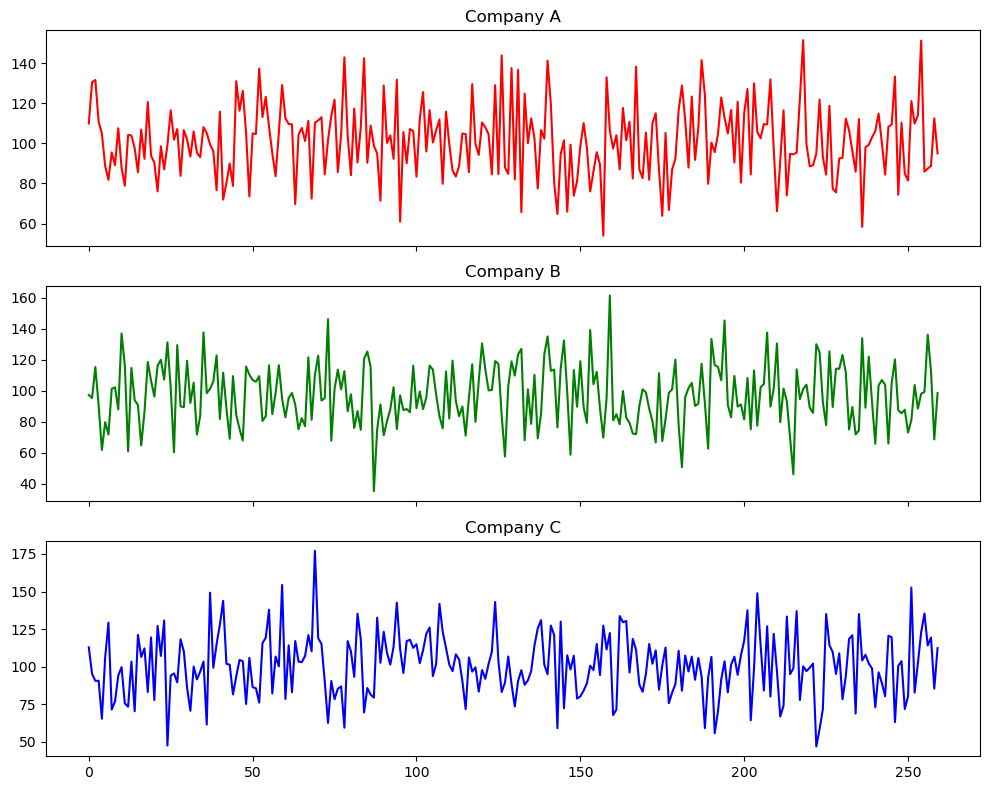

In [32]:
# Plotting
fig, axs = plt.subplots(3, figsize=(10, 8), sharex=True)

# Plotting each company's data
data_stock['Company A'].plot(ax=axs[0], color='r')
axs[0].set_title('Company A')

data_stock['Company B'].plot(ax=axs[1], color='g')
axs[1].set_title('Company B')

data_stock['Company C'].plot(ax=axs[2], color='b')
axs[2].set_title('Company C')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [33]:
#Perform the Augmented Dickey Fuller Test to determine the stationarity of the graphs
#If this comes back at a high level for each company, there is no reak way to evaluate performance
print('Company A - ADF Test')
adf_test(data_stock['Company A'])
print()
print('Company B - ADF Test')
adf_test(data_stock['Company B'])
print()
print('Company C - ADF Test')
adf_test(data_stock['Company C'])

Company A - ADF Test
ADF Statistic:  -17.328377407052628
P-Value:  5.428714493560247e-30
Critical Value: 
	1%: -3.46
	5%: -2.87
	10%: -2.57

Company B - ADF Test
ADF Statistic:  -12.478506195251528
P-Value:  3.1292222639171183e-23
Critical Value: 
	1%: -3.46
	5%: -2.87
	10%: -2.57

Company C - ADF Test
ADF Statistic:  -6.168399934893085
P-Value:  6.899858545712441e-08
Critical Value: 
	1%: -3.46
	5%: -2.87
	10%: -2.57


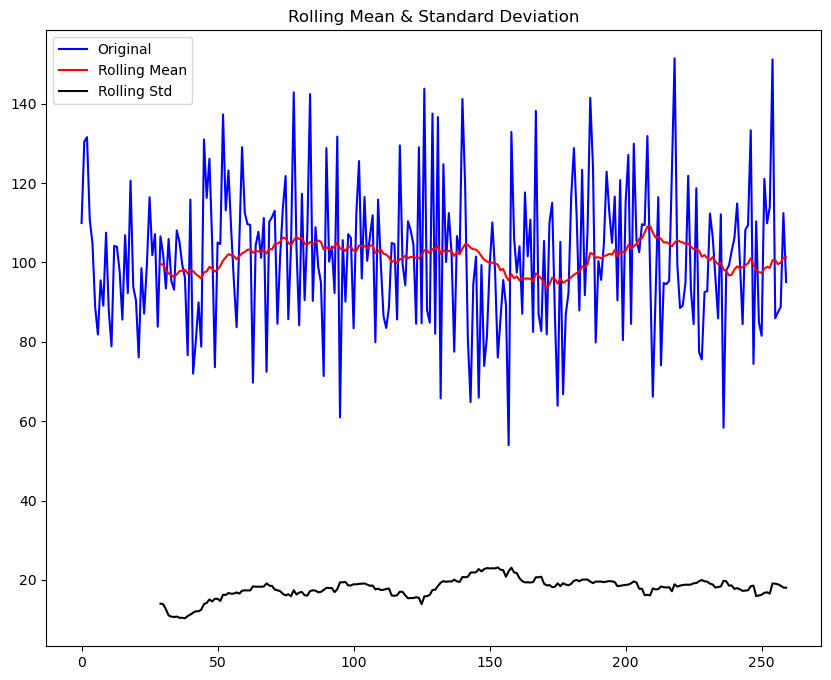

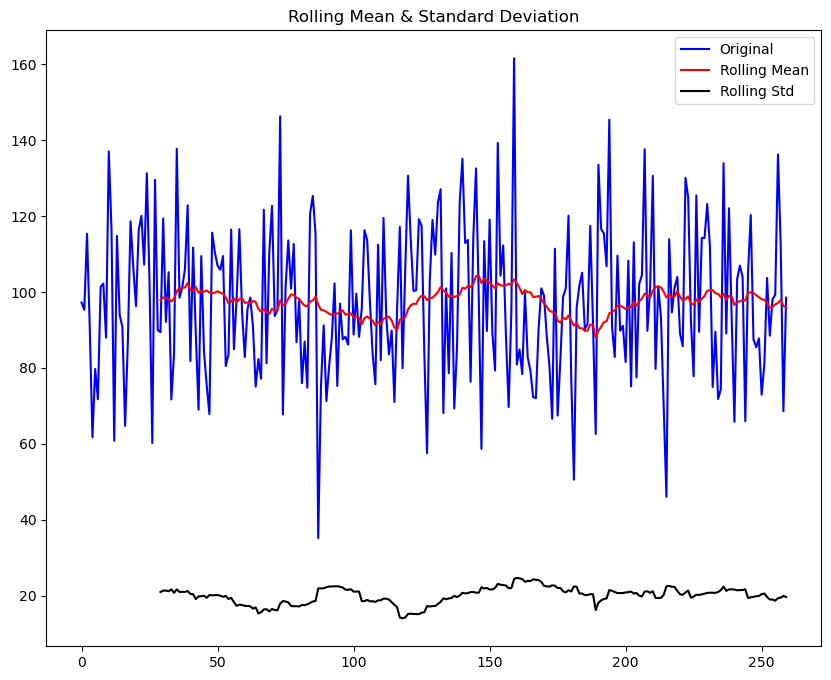

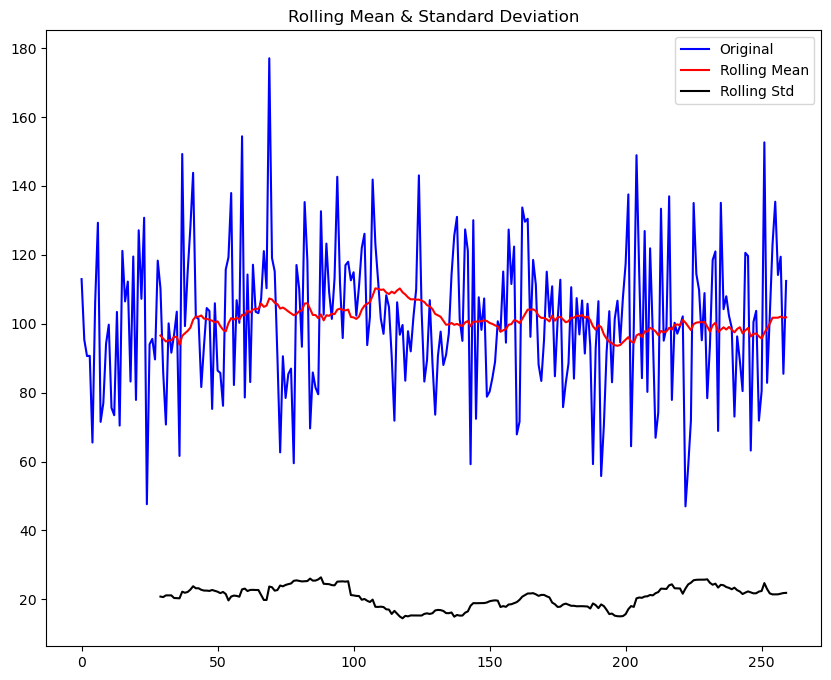

<Figure size 640x480 with 0 Axes>

In [34]:
# Plotting
plt.figure(figsize=(10, 8))

# Plotting each company's data
roll_mean_std_dev(data_stock['Company A'],30)

plt.figure(figsize=(10, 8))
roll_mean_std_dev(data_stock['Company B'],30)

plt.figure(figsize=(10, 8))
roll_mean_std_dev(data_stock['Company C'],30)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## 3. Environmental Studies
Interpolate data points for a geographic region based on sparse environmental measurements (e.g., pollution levels, rainfall).

In [35]:
import numpy as np
import pandas as pd
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

def lagrange_interpolation_non_time(df, x_column, y_column, rainfall_1, rainfall_2, x_data_points, title, xlabel, ylabel):
    """
    df is the dataframe that the original data is going to be collected from
    x_column is the name of the column for the x values
    y_column is the name of the column for the y values
    rainfall_1 is the first rainfall value for the desired interpolated data
    rainfall_2 is the second rainfall value for the desired interpolated data
    x_data_points is the number of times that the interpolated data will return y values
    for example: if you have 28 as the x_data_points for a week you will get 4 data points per day (28/7=4)
    title is the name of the graph that will return the interpolated data
    xlabel is the name of the x axis label for the interpolated data graph
    ylabel is the name of the y axis label for the interpolated data graph
    """
    # Filter the dataframe based on rainfall range
    sliced_data = df.loc[(df[y_column] >= rainfall_1) & (df[y_column] <= rainfall_2)]

    # Create the x-values based on the rainfall values from the sliced data
    x = np.array(sliced_data[x_column])
    # Create the y values based on the rainfall values from the sliced data
    y = np.array(sliced_data[y_column])

    # This is going to create an array which has the polynomial coefficients for the data
    # It takes the series of x and y data and applies the lagrange method 
    poly = lagrange(x, y)

    # Using poly.coef is going to return the coefficients of the polynomial from the x and y values above
    # Turn the array of coefficients in the reverse order so that the graph can be plotted
    coefficients = poly.coef[::-1]

    # Generate x values for plotting the polynomial
    # The more x_data_points used the smoother the curve will be
    x_values = np.linspace(x.min(), x.max(), x_data_points)

    # Create the polynomial y values that are created at the times of the x_values
    # The polynomial function takes the coefficients from the lagrange interpolation of x and y values
    # It also takes the x_values to return those y values at the interval of x values
    y_values = Polynomial(coefficients)(x_values)

    # Plot the interpolation
    plt.plot(x_values, y_values, label='Interpolation')
    # Graph the original data points on the graph
    plt.scatter(x, y, color='red', label='Data Points')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Lagrange Interpolation of ' + title)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return the table of results and sliced data
    interpolated_data = pd.DataFrame({xlabel: x_values, ylabel: y_values})
    return interpolated_data, x, y, x_values, y_values, sliced_data

In [36]:
#Import the data
data_environmental = pd.read_csv('environmental_study.csv')
data_environmental

,Location,Pollution_Level_PM2.5,Rainfall_mm
0,Location_1,36.341113,126.880192
1,Location_2,17.876270,169.886359
2,Location_3,15.208315,144.891065
3,Location_4,29.809165,122.204702
4,Location_5,37.376104,144.488677
5,Location_6,24.039791,64.591783
6,Location_7,49.134389,72.357731
7,Location_8,35.817338,45.652646
8,Location_9,26.641936,58.742809
9,Location_10,22.645288,126.195225


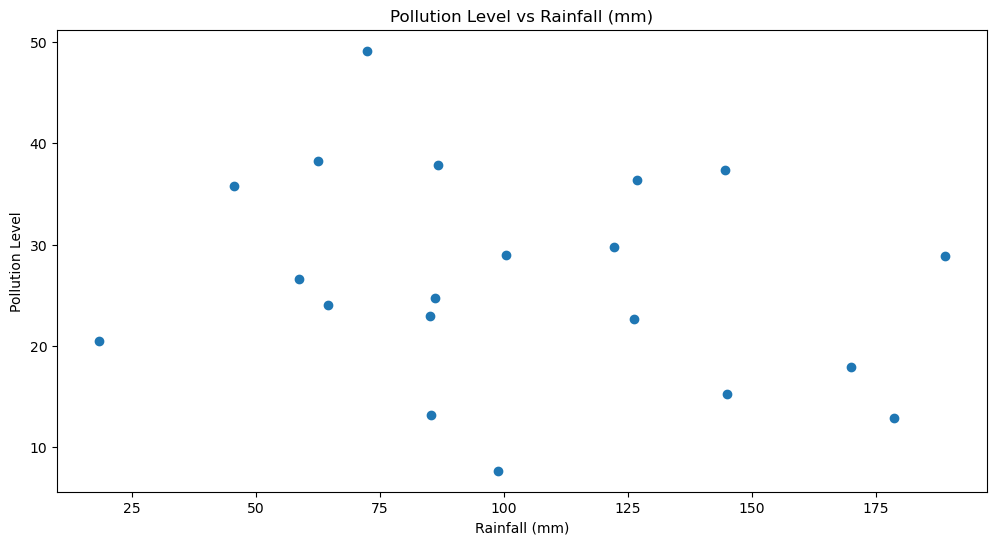

In [37]:
scatterplot(data_environmental['Rainfall_mm'],data_environmental['Pollution_Level_PM2.5'],'Pollution Level vs Rainfall (mm)','Rainfall (mm)','Pollution Level')

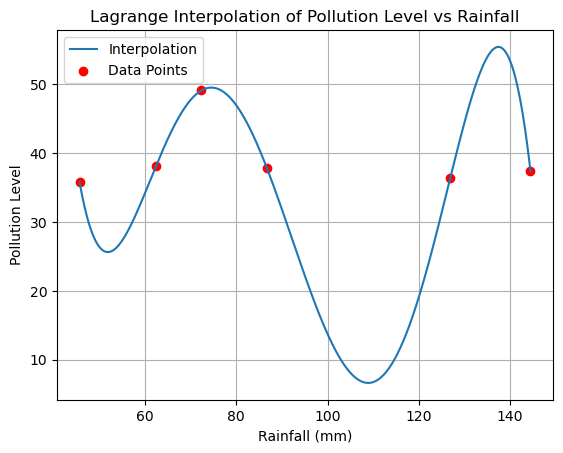

,Rainfall (mm),Pollution Level
0,45.652646,35.817338
1,45.751581,35.452269
2,45.850516,35.095256
3,45.949451,34.746219
4,46.048386,34.405080
...,...,...
995,144.092937,39.593677
996,144.191872,39.055659
997,144.290807,38.506787
998,144.389742,37.946967


In [38]:
interpolation_environment_1 = lagrange_interpolation_non_time(data_environmental, 'Rainfall_mm','Pollution_Level_PM2.5',30,50,1000,'Pollution Level vs Rainfall','Rainfall (mm)', 'Pollution Level')[0]
interpolation_environment_1

## 4. Engineering Applications
 Given experimental data points from materials testing (e.g., stress-strain values), interpolate missing values to model material behavior.

In [39]:
#Load in the data for Engineering Applications
data_engineering = pd.read_csv('engineering_data.csv')
data_engineering

,Sample,Stress_MPa,Strain
0,Sample_1,66.155766,0.033466
1,Sample_2,20.405656,0.029297
2,Sample_3,38.555693,0.031245
3,Sample_4,47.334359,0.033734
4,Sample_5,87.967824,0.042117
5,Sample_6,32.540983,0.004160
6,Sample_7,53.473084,0.038184
7,Sample_8,98.700381,0.012183
8,Sample_9,56.753661,0.009711
9,Sample_10,65.160507,0.028623


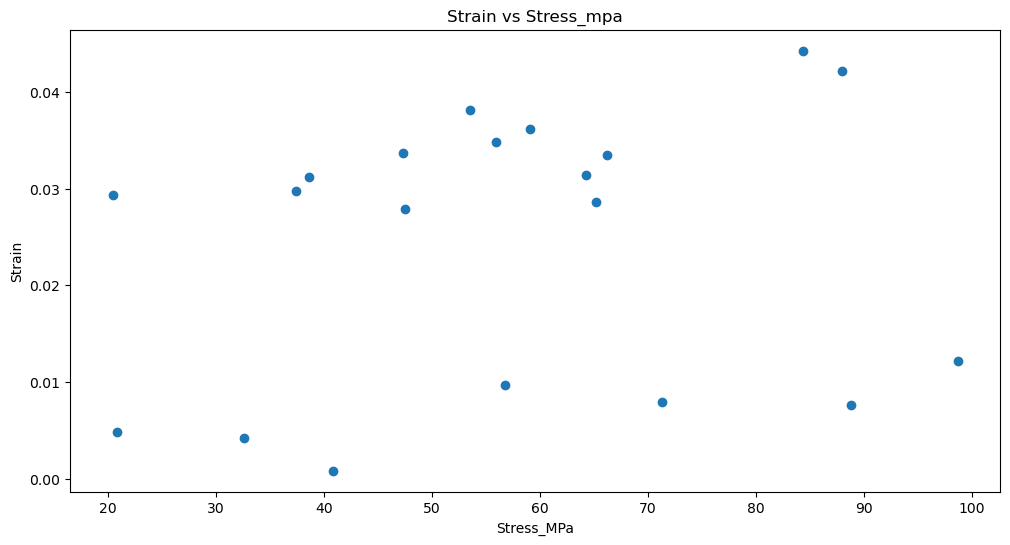

In [40]:
scatterplot(data_engineering['Stress_MPa'],data_engineering['Strain'],'Strain vs Stress_mpa','Stress_MPa','Strain',)

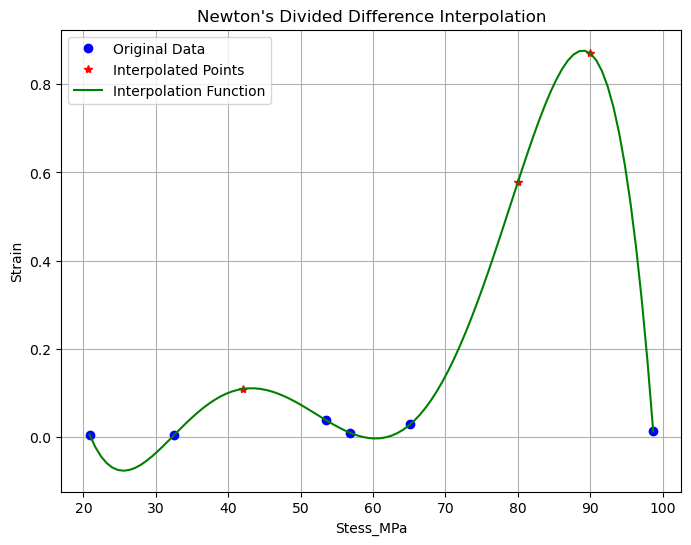

In [41]:
#Create x and y values to be used in Newton's Divided Difference
x = data_engineering['Stress_MPa'].loc[5:10].to_numpy()
y = data_engineering['Strain'].loc[5:10].to_numpy()
missing_days = [42, 80,90]
plot_interpolation(x, y, missing_days, interpolate(x, y, missing_days), 'Stess_MPa', 'Strain')

## 5. Sports Performance Analysis
Use recorded performance metrics (e.g., speed, distance) from sports events to interpolate missing values for a comprehensive performance analysis.

In [42]:
#Load in the data for Sports Performance Analysis
data_sports_performance = pd.read_csv('sports_performance.csv')
data_sports_performance

,Athlete,Speed_km_h,Distance_km
0,Athlete_1,23.187664,23.985742
1,Athlete_2,26.919703,29.665108
2,Athlete_3,25.543832,8.918614
3,Athlete_4,23.889506,9.843113
4,Athlete_5,29.251325,16.913282
5,Athlete_6,28.416700,29.477880
6,Athlete_7,23.573976,36.320730
7,Athlete_8,20.435915,25.470522
8,Athlete_9,23.047681,36.614742
9,Athlete_10,23.981857,19.238999


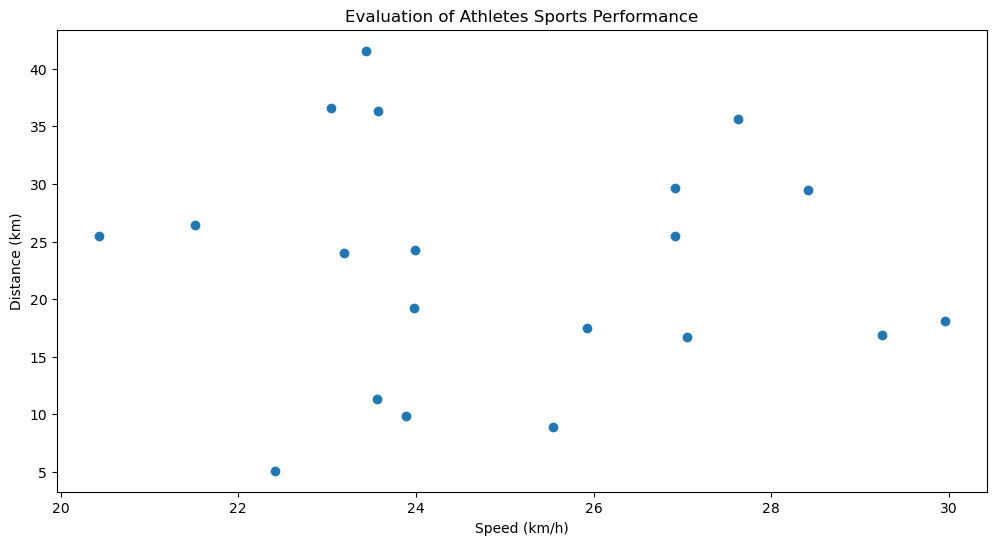

In [43]:
scatterplot(data_sports_performance['Speed_km_h'],data_sports_performance['Distance_km'],
            'Evaluation of Athletes Sports Performance','Speed (km/h)','Distance (km)')

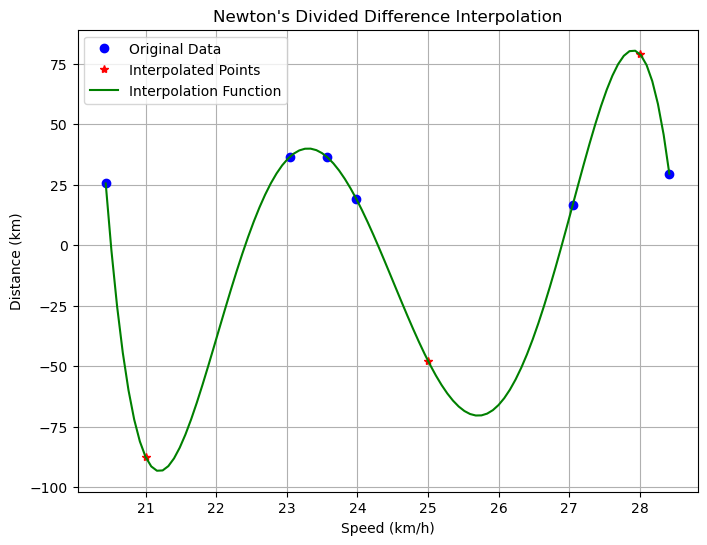

In [44]:
#Create x and y values to be used in Newton's Divided Difference
x = data_sports_performance['Speed_km_h'].loc[5:10].to_numpy()
y = data_sports_performance['Distance_km'].loc[5:10].to_numpy()
missing_days = [28, 21,25]
plot_interpolation(x, y, missing_days, interpolate(x, y, missing_days), 'Speed (km/h)', 'Distance (km)')

## 2. Chebyshev Distance
- Calculate the Chebyshev Distance between two sets of points. (10 points)
- Discuss the significance of Chebyshev Distance in the context of approximation and interpolation. How does it compare to other distance metrics like Euclidean distance? (10 points)

In [45]:
cheb_distance = pd.read_csv('chebyshev_data.csv')
cheb_distance

,x,y
0,-0.636350,-0.633191
1,-0.391516,0.049513
2,-0.136110,-0.417542
3,0.223706,-0.721012
4,-0.415711,-0.267276
5,-0.087860,0.570352
6,-0.600652,0.028469
7,0.184829,-0.907099
8,0.215090,-0.658952
9,-0.869897,0.897771


In [46]:
x_values = np.array(cheb_distance['x']) 
y_values = np.array(cheb_distance['y']) 

In [47]:
print(x_values)
print(y_values)

[-0.63635007 -0.39151551 -0.13610996  0.22370579 -0.4157107  -0.08786003
 -0.60065244  0.18482914  0.2150897  -0.86989681]
[-0.63319098  0.04951286 -0.41754172 -0.72101228 -0.26727631  0.57035192
  0.02846888 -0.90709917 -0.65895175  0.89777107]


In [48]:
#Create a function called chebyshev_distance

def chebyshev_distance(vector1,vector2):
    """ 
    Calculate the Chebyshev distance between the two vectors

    Parameters:
        Vector1: (list, tuple, series, array-like): First Vector.
        Vector2: (list, tuple, series. array-like): Second Vector.
    
    Returns:
        float: Chebyshev distance between the 2 vectors.
    """

    if len(vector1) != len(vector2):
        raise ValueError('Vectors must have the same length.')
    
    chebyshev_distance = max(abs(x-y) for x,y in zip(vector1,vector2))

    return chebyshev_distance

In [49]:
distance = chebyshev_distance(cheb_distance['x'],cheb_distance['y'])
print('Chebyshev Distance: ',distance)


Chebyshev Distance:  1.7676678885361075


## 3. Cubic Splines
- Implement Cubic Splines to fit a smooth curve through a set of data points. (15 points)
- Evaluate the smoothness of the curve by adjusting the spline parameters. Discuss the trade-offs between curve smoothness and fitting accuracy. (15 points)

In [50]:
data_cubic = pd.read_csv('cubic_splines_data.csv')
data_cubic

,x,y
0,-3.000000,-1.050056
1,-2.877551,-0.994512
2,-2.755102,-0.986408
3,-2.632653,-0.688034
4,-2.510204,-0.808558
5,-2.387755,-0.834839
6,-2.265306,-0.557754
7,-2.142857,-0.663450
8,-2.020408,-0.413730
9,-1.897959,-0.517325


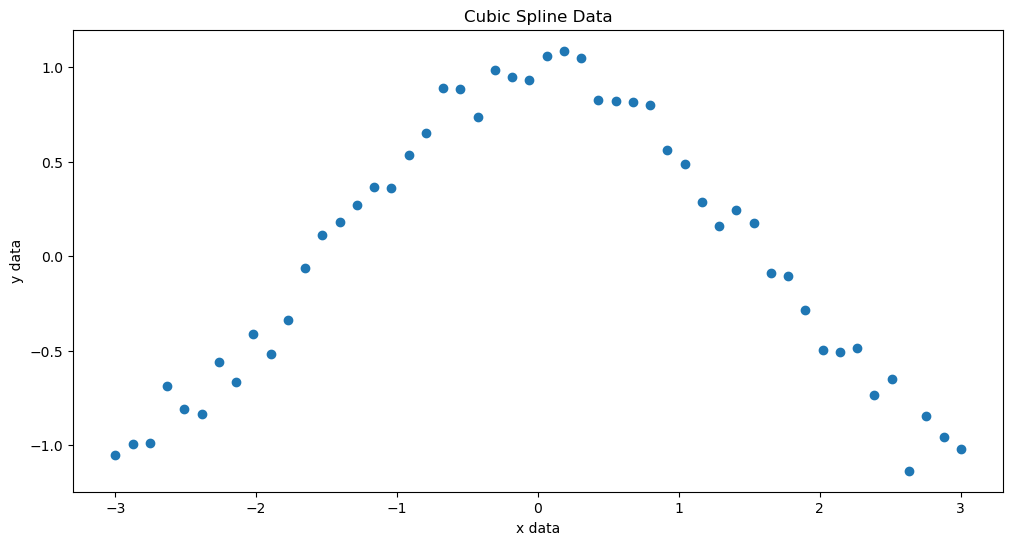

In [51]:
#Plot the graph
scatterplot(data_cubic['x'],data_cubic['y'],'Cubic Spline Data','x data','y data')

### Changing the smoothness of the cubic spline

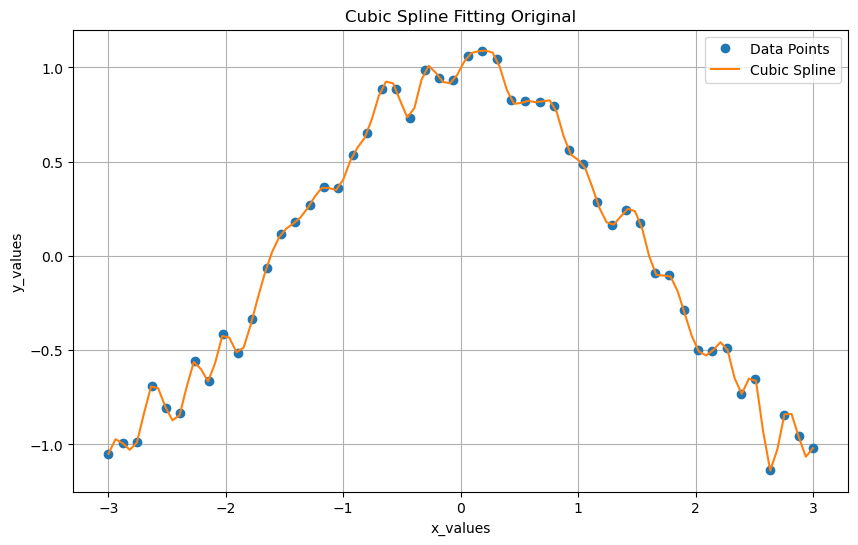

In [52]:
#Create a cubic spline
from scipy.interpolate import CubicSpline
cubicspline = CubicSpline(data_cubic['x'],data_cubic['y'])

x_smooth = np.linspace(data_cubic['x'].min(),data_cubic['x'].max(),100)
y_smooth = cubicspline(x_smooth)

plt.figure(figsize=(10, 6))
plt.plot(data_cubic['x'],data_cubic['y'],'o',label = 'Data Points')
plt.plot(x_smooth,y_smooth,label='Cubic Spline')
plt.legend()
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.title('Cubic Spline Fitting Original')
plt.grid(True)
plt.show()

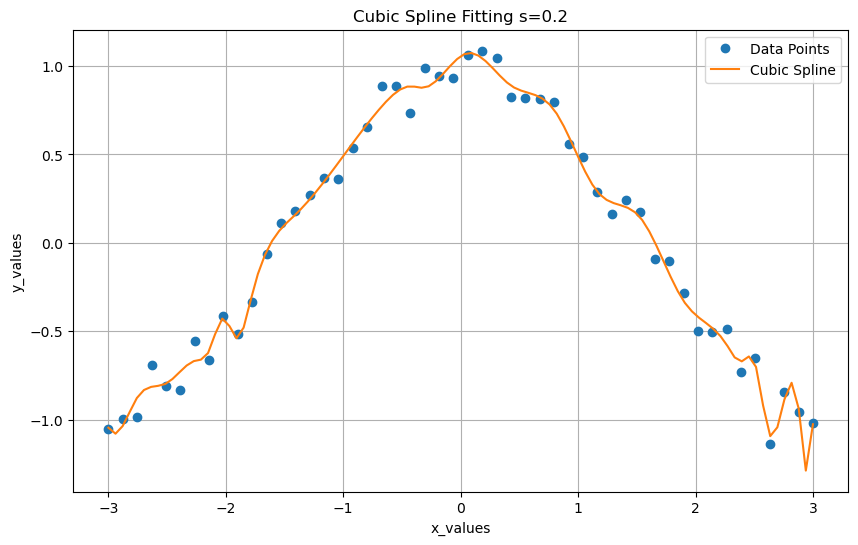

In [53]:
#Create a new cubic spline which has a higher s value value which is going to increase the smoothness
from scipy.interpolate import UnivariateSpline
cubicspline = CubicSpline(data_cubic['x'],data_cubic['y'])

spline = UnivariateSpline(data_cubic['x'],data_cubic['y'],s=0.2)

x_smooth = np.linspace(data_cubic['x'].min(),data_cubic['x'].max(),100)
y_smooth = spline(x_smooth)

plt.figure(figsize=(10, 6))
plt.plot(data_cubic['x'],data_cubic['y'],'o',label = 'Data Points')
plt.plot(x_smooth,y_smooth,label='Cubic Spline')
plt.legend()
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.title('Cubic Spline Fitting s=0.2')
plt.grid(True)
plt.show()

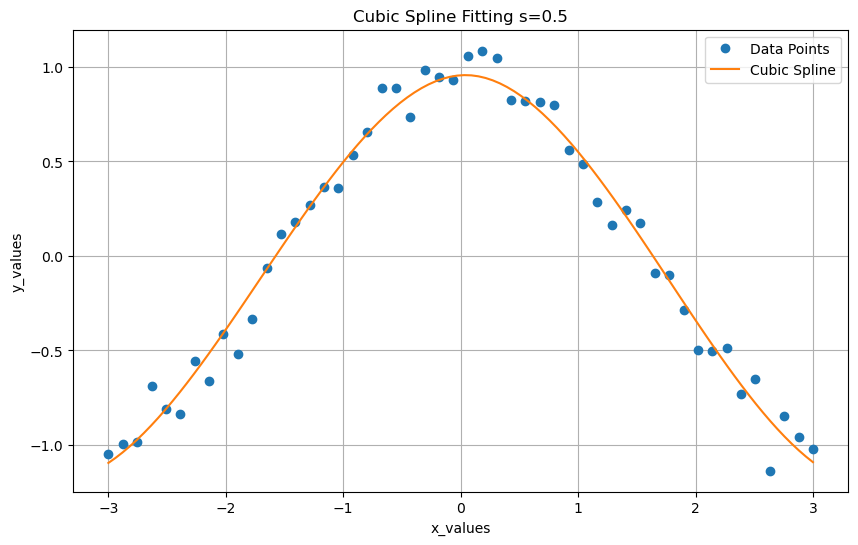

In [54]:
#Create a new cubic spline which has a higher s value value which is going to increase the smoothness
from scipy.interpolate import UnivariateSpline
cubicspline = CubicSpline(data_cubic['x'],data_cubic['y'])

spline = UnivariateSpline(data_cubic['x'],data_cubic['y'],s=0.5)

x_smooth = np.linspace(data_cubic['x'].min(),data_cubic['x'].max(),100)
y_smooth = spline(x_smooth)

plt.figure(figsize=(10, 6))
plt.plot(data_cubic['x'],data_cubic['y'],'o',label = 'Data Points')
plt.plot(x_smooth,y_smooth,label='Cubic Spline')
plt.legend()
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.title('Cubic Spline Fitting s=0.5')
plt.grid(True)
plt.show()

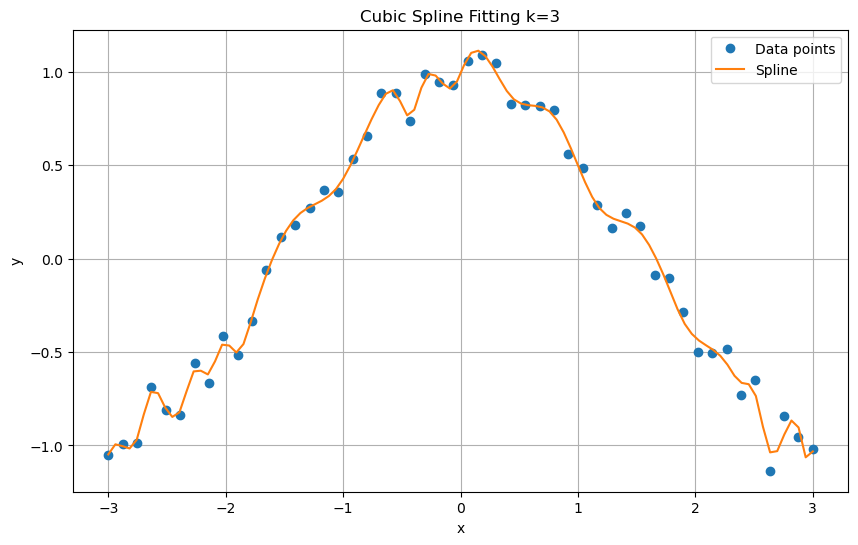

In [55]:
plt.figure(figsize=(10,6))

# Fit spline with specified parameters
spline = UnivariateSpline(data_cubic['x'], data_cubic['y'], s=0.1, k=3, ext='raise')  # Adjust smoothing parameter 's', degree 'k', and extrapolation behavior 'ext'

# Evaluate spline on finer grid
x_smooth = np.linspace(data_cubic['x'].min(), data_cubic['x'].max(), 100)
y_smooth = spline(x_smooth)

# Plot original data and spline curve
plt.plot(data_cubic['x'], data_cubic['y'], 'o', label='Data points')
plt.plot(x_smooth, y_smooth, label='Spline')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Fitting k=3')
plt.grid(True)
plt.show()

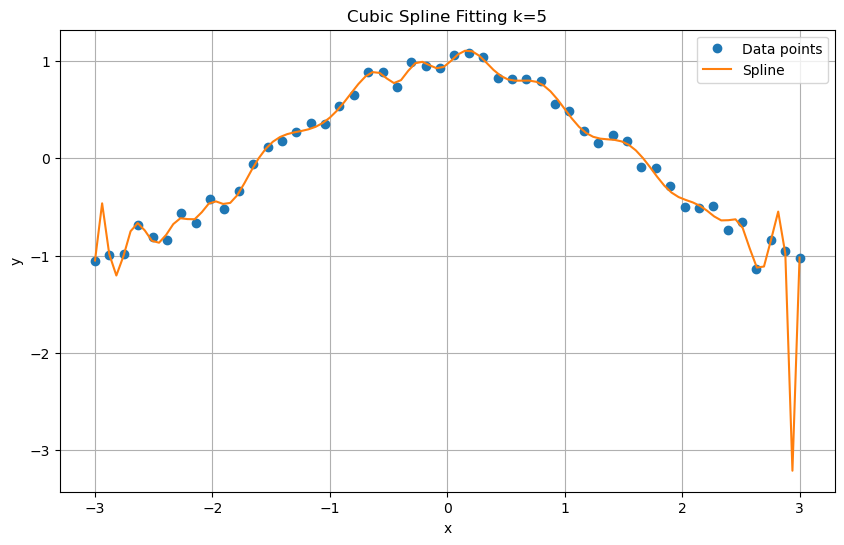

In [56]:
plt.figure(figsize=(10,6))

# Fit spline with specified parameters
spline = UnivariateSpline(data_cubic['x'], data_cubic['y'], s=0.1, k=5, ext='raise')  # Adjust smoothing parameter 's', degree 'k', and extrapolation behavior 'ext'

# Evaluate spline on finer grid
x_smooth = np.linspace(data_cubic['x'].min(), data_cubic['x'].max(), 100)
y_smooth = spline(x_smooth)

# Plot original data and spline curve
plt.plot(data_cubic['x'], data_cubic['y'], 'o', label='Data points')
plt.plot(x_smooth, y_smooth, label='Spline')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Fitting k=5')
plt.grid(True)
plt.show()